## Group Members: Alain, Akari, Mariah, Diego, Faizah

#**Part 1: Establishing Baseline Models**

**Importing Packages**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

**Pre-Analysis of Our Data**

In [ ]:
# First look at the dataset

df=pd.read_csv("diabetes.csv")
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Shape of the dataset

df.shape

# 768 rows and 9 columns

(768, 9)

In [ ]:
# Summary statistics

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Here we get to see our columns and their statistics. It seems that there are some outliers in this dataset. We see someone that has had 17 pregnancies which is pretty uncommon. Having a glucose level of 0 is unusual, having a blood pressure of 0 is also very unusual, having a skin thickness of 0 is not normal, an insulin level of 846 is also considered extremely high but an insulin level of 0 can indicate Type 1 diabetes (the body does not produce insulin), and a BMI of 67.1 can be classified as morbidly obese while a BMI of 0 can indicate an error. So really, the only features that seem normal are "Age" with range 21-81 years old, the Diabetes Pedigree Function, and the outcome. We can take a look at these unique cases and outliers later.

In [ ]:
# Check for any missing values

df.isnull().sum()

# No null values

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


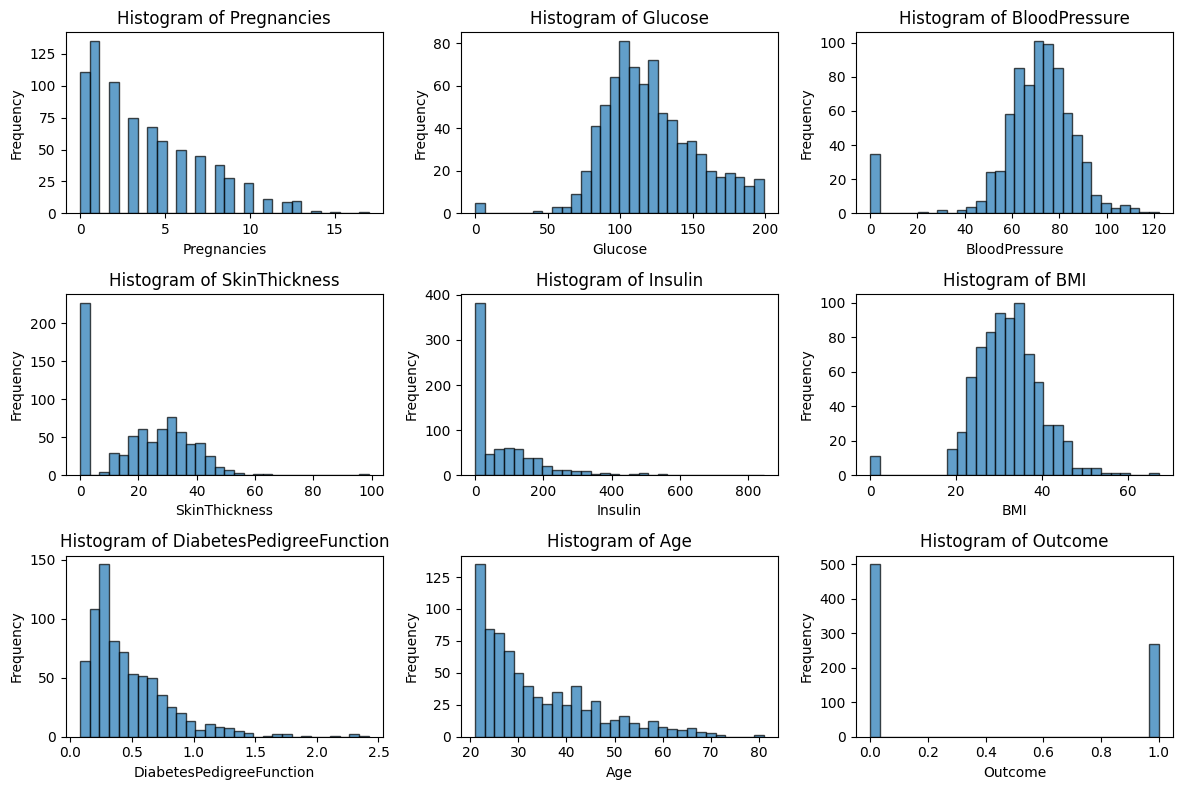

In [ ]:
# Seeing the distributions of our features

columns_to_plot=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
plt.figure(figsize=(12, 8))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    plt.hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

These histograms for our features seem to make sense except for the few outliers that might be worth looking in to. Like high numbers of pregnancies, a glucose level of 0, a blood pressure of 0, a skin thickness of 0, very high levels of insulin (insulin presence of 0 makes sense because of Type 1 diabetes) but also high levels of insulin can be indicators of Type 2 diabetes, and BMI indices of 0 and extreme values higher than ~40. Still, we see some unbalanced classes so we might need to do some standardizing and feature scaling later.

**Making Our Baseline Models**

In [ ]:
X = df.drop(columns=["Outcome"])  # Features
y = df["Outcome"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 768 rows in our dataset, so we can do 80% training, 20% testing

# Print the shapes of the resulting datasets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 614 samples
Test set size: 154 samples



KNN Classification Performance:
Accuracy: 0.66

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.71      0.73        99
           1       0.52      0.58      0.55        55

    accuracy                           0.66       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.66      0.67       154



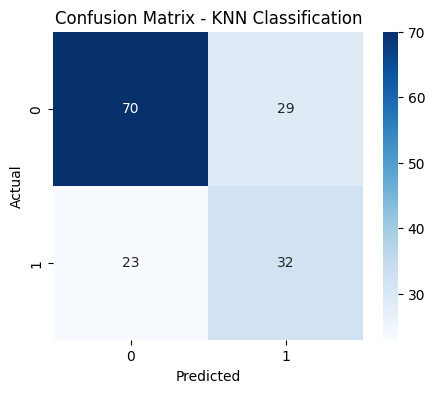

In [ ]:
#KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X = df.drop(columns=['Outcome'])
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


def evaluate_classification_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.2f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    # Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

evaluate_classification_model(y_test, y_pred, "KNN Classification")



Decision Tree Classification Performance:
Accuracy: 0.70

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78       101
           1       0.57      0.51      0.54        53

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



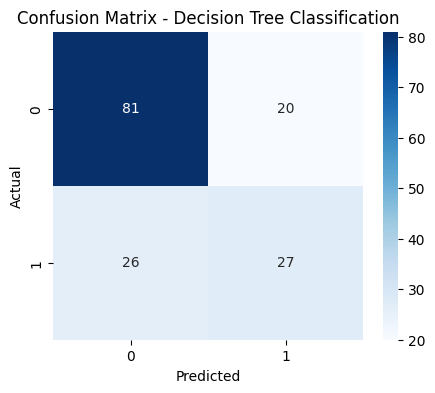

In [ ]:
## Decision Tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop(columns=['Outcome'])
y = df['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

n = X_test.shape[0]
p = X_train.shape[1]

dt_model = DecisionTreeClassifier(random_state=50)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

def evaluate_classification_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.2f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    # Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

evaluate_classification_model(y_test, dt_preds, "Decision Tree Classification")

**Comparison of Evaluation Metrics of KNN vs Decision Tree Models**

On our raw data with random state 42, we see that our Decision Tree classifier actually performs better on our raw data. If it was random state 100, the KNN model actually performs better but we will work with random state 42. Some possible reasons for difference in performances between KNN and DT could be model assumptions. KNN is a non-parametric model so it doesn't make assumptions while DT's can model complex interactions. It could also be because of the distribution of the data. KNN is better for classes that are closer to each other and DT works better when there are clear thresholds or explicitly defined boundaries. Outliers also play an important part. KNN is sensitive to outliers while DT's aren't. However, DT's can overfit more easily if not pruned correctly but we can always play around with the maximum depth parameters. Also scaling sensitivity where KNN is more sensitive to feature scaling while DT's aren't. Overall on our raw data, the decision tree classifier actually has decent results with around ~70 and up scores in Class 0 and ~50 and up scores in Class 1 but we can make it better.

#**Part 2: Data Exploration and Preprocessing Impact on Models**

###**A: Exploratory Data Analysis (EDA)**

We did descriptive statistics and visualization histograms in Part 1, but here let's do correlation between the features to see if there could be any potential multicollinearity issues.

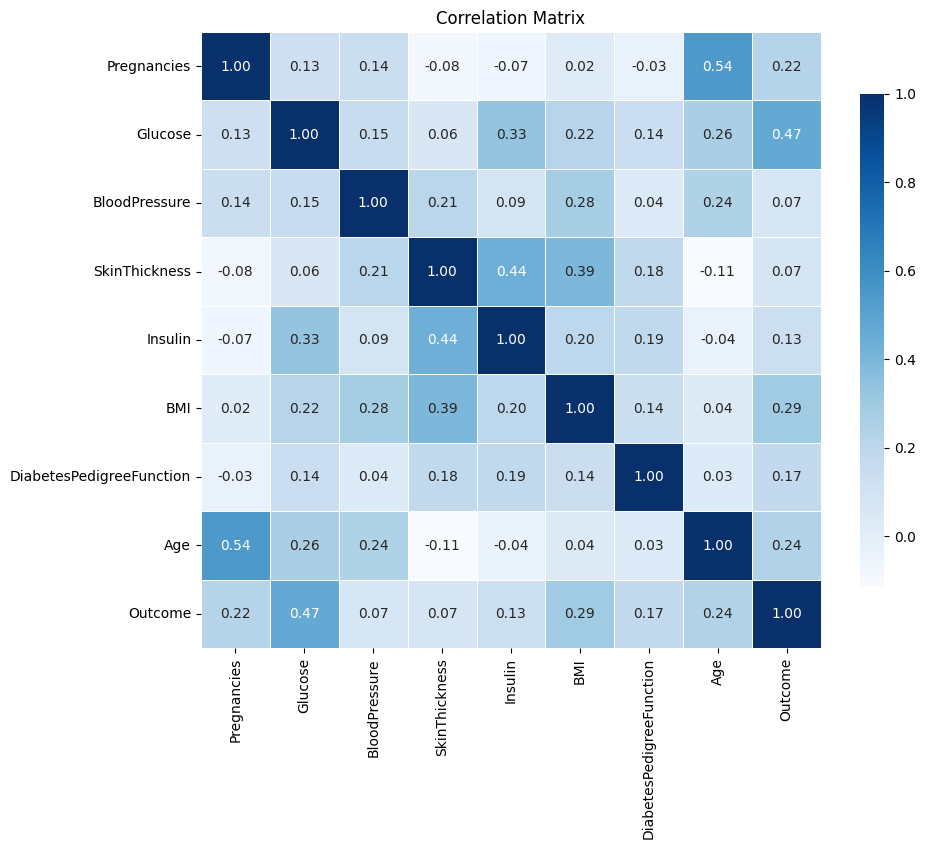

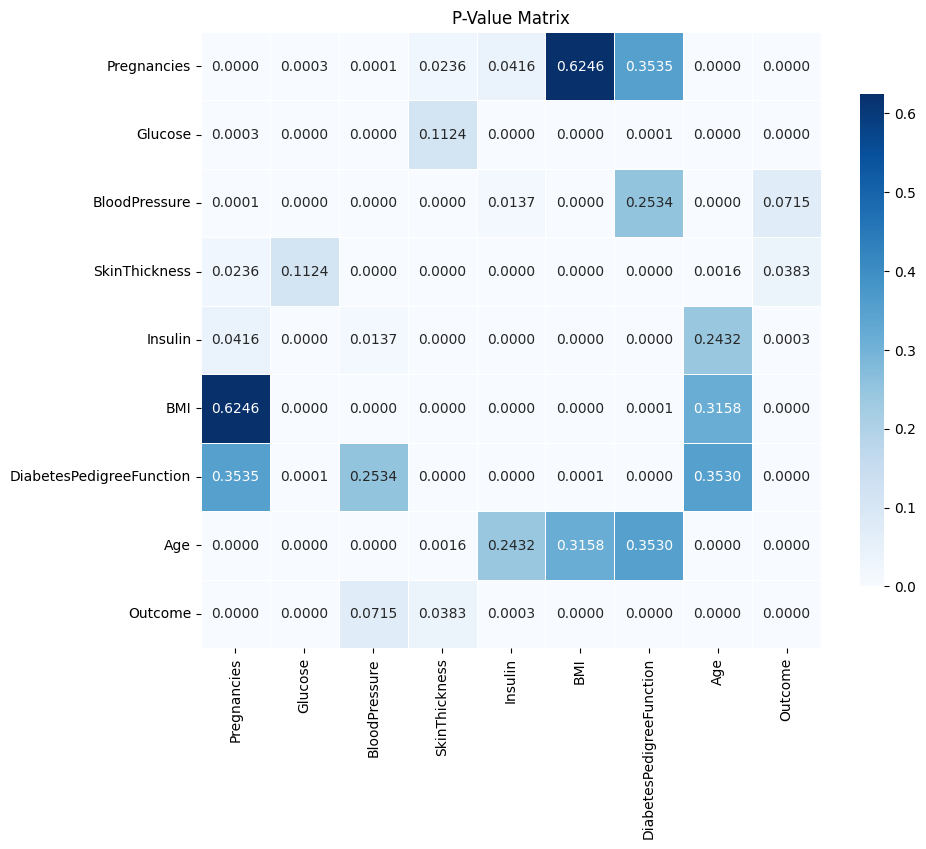

In [ ]:
correlation_matrix = df.corr()

# Calculate the p-values so we can see the significance of the correlations
def calculate_p_values(df):
    p_values = pd.DataFrame(np.ones((df.shape[1], df.shape[1])), columns=df.columns, index=df.columns)
    for i in range(df.shape[1]):
        for j in range(df.shape[1]):
            _, p_value = pearsonr(df.iloc[:, i], df.iloc[:, j])
            p_values.iloc[i, j] = p_value
    return p_values

p_values_matrix = calculate_p_values(df)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix')
plt.show()

# Visualize the p-value matrix
plt.figure(figsize=(10, 8))
sns.heatmap(p_values_matrix, annot=True, cmap="Blues", fmt=".4f", linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('P-Value Matrix')
plt.show()

 From the correlation matrix, we see that some values (like age - pregnancy, glucose - outcome, and glucose - insulin levels) are moderately positively correlated but nothing too intense (0.8 or 0.9) to indicate multi-collinearity. In the p-value matrix, we see that BMI and pregnancy's p-value is insignificant (greater than alpha = 0.05). Which makes sense because pregnancy doesn't really affect a woman's body mass index when she is not pregnant. Becuase nothing seems too alarming and most algorithms can handle moderate correlations, we do not need to be too worried about multicollinearity affecting our results.

###**B: Handling Missing Values**

There are no missing values as seen in Part 1, but there are some things to address like outliers in our data. Particularly the values that might not make sense. From our summary statistics, this is what we want to address or fix:


*   Investigate cases with higher than 8 pregnancies
*   Glucose levels of 0 and outliers
*   Blood pressure of 0 and outliers
*   Skin thickness of 0 and outliers
*   Make sure that high levels of insulin has high levels of glucose
*   BMI of 0 and investigate cases of BMI over 40

**Investigating cases with higher than 8 pregnancies**

In [ ]:
# How many cases have more than 8 pregnancies

pregnancies_above_8 = df[df['Pregnancies'] > 8]
pregnancies_above_8_count = pregnancies_above_8.shape[0]
print(f"Number of rows with more than 8 pregnancies: {pregnancies_above_8_count}\n")

# How many pregnancies higher than 8 counts are diabetic or not

pregnancies_above_8 = df[df['Pregnancies'] > 8]
pregnancies_outcome_counts = pregnancies_above_8.groupby('Outcome').size()
pregnancies_outcome_counts


Number of rows with more than 8 pregnancies: 86



,0
Outcome,
0,38
1,48


In [ ]:
# The case for higher than 13 pregnancies
df[df['Pregnancies'] > 13]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1


From our correlation matrix, we see that r=0.22 between number of pregnancies and the outcome of if a patient has diabetes or not. Here in our analysis for this point, it seems that more pregnancies does also point to a patient having diabetes. This is ture even in our outlier cases with 14, 15, and 17 pregnancies. So because of this, we will keep these outliers and at the end of the preprocessing steps, we can just standardize. So here, we validated our outliers to see if it was an error or if it makes sense, and it does seem to make sense albeit rare.

**Glucose levels of 0 and outliers**

In [ ]:
# See the unique values of the "Glucose" column to see how low/high the levels get

unique_glucose_values = df['Glucose'].unique()
print("Unique values in Glucose column:", unique_glucose_values)

# The next lowest value is 61 which is considered normal but on the lower end of the spectrum

Unique values in Glucose column: [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]


In [ ]:
# How many rows have a glucose level of 0 and does this make sense

count_glucose_zero = df[df['Glucose'] == 0].shape[0]
print(f"Number of rows with glucose levels of 0: {count_glucose_zero}\n")
df[df['Glucose'] == 0]


Number of rows with glucose levels of 0: 5



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [ ]:
# Glucose level 0 does not make sense, so let's impute based on BMI. If BMI > 30, glucose = 150. Otherwise, 90.

df['Glucose'] = df.apply(
    lambda row: 150 if row['BMI'] > 30 and row['Glucose'] == 0 else (90 if row['Glucose'] == 0 else row['Glucose']),
    axis=1)

df.loc[[75, 182, 342, 349, 502]]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,90.0,48,20,0,24.7,0.140,22,0
182,1,90.0,74,20,23,27.7,0.299,21,0
342,1,150.0,68,35,0,32.0,0.389,22,0
349,5,150.0,80,32,0,41.0,0.346,37,1
502,6,150.0,68,41,0,39.0,0.727,41,1


First we start out seeing the unique values in this Glucose column. Glucose level 0 seems to be the only one that we need to fix because a glucose level of 0 is nearly impossible. We have 5 cases with a level of 0, so we need to fix it. Looking at the correlation matrix, we see that the next highest r value is between BMI and outcome with r=0.29. Because of that positive correlation and real life reasoning, a higher BMI is usually related to diabetes. So our imputation here is that if BMI > 30 (Obese), we replace it with the median glucose level of 150 mg/dL, which we looked up online. Then otherwise or if BMI is around 22 (Normal), we replace it with the median glucose level of 90 mg/dL.

In [ ]:
# Seeing the outliers with high glucose levels BUT no diabetes (RARE CASES)

df[(df['Glucose'] > 190) & (df['Outcome'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
228,4,197.0,70,39,744,36.7,2.329,31,0
258,1,193.0,50,16,375,25.9,0.655,24,0
260,3,191.0,68,15,130,30.9,0.299,34,0
489,8,194.0,80,0,0,26.1,0.551,67,0


These 4 rows above are pretty rare cases but still make sense as these could be possible cases of early-stage insulin resistance or pre-diabetes. We will keep these cases in mind for later but not get rid of them since they still do make sense. These could be high risk patients.

**Blood Pressure of 0 and outliers**

In [ ]:
# See the unique values of the "Blood Pressure" column

unique_bp_values = df['BloodPressure'].unique()
print("Unique values in BP column:", unique_bp_values)

Unique values in BP column: [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]


In [ ]:
# How many rows have a blood pressure level of 0 and does this make sense

count_bp_zero = df[df['BloodPressure'] == 0].shape[0]
print(f"Number of rows with blood pressure levels of 0: {count_bp_zero}\n")
df[df['BloodPressure'] == 0]

Number of rows with blood pressure levels of 0: 35



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115.0,0,0,0,35.3,0.134,29,0
15,7,100.0,0,0,0,30.0,0.484,32,1
49,7,105.0,0,0,0,0.0,0.305,24,0
60,2,84.0,0,0,0,0.0,0.304,21,0
78,0,131.0,0,0,0,43.2,0.270,26,1
81,2,74.0,0,0,0,0.0,0.102,22,0
172,2,87.0,0,23,0,28.9,0.773,25,0
193,11,135.0,0,0,0,52.3,0.578,40,1
222,7,119.0,0,0,0,25.2,0.209,37,0
261,3,141.0,0,0,0,30.0,0.761,27,1


In [ ]:
# BP level of 0 is impossible, so if BMI > 30 AND age > 40, bp = 120 (upper end of dataset), else bp = 110

bmi_threshold = 30
age_threshold = 40
df.loc[(df['BloodPressure'] == 0) & (df['BMI'] > bmi_threshold) & (df['Age'] > age_threshold), 'BloodPressure'] = 120
df.loc[(df['BloodPressure'] == 0) & ((df['BMI'] <= bmi_threshold) | (df['Age'] <= age_threshold)), 'BloodPressure'] = 110
df.loc[[7, 15, 49, 60, 78, 81, 172, 193, 222, 261, 266, 269, 300, 332, 336, 347, 357, 426, 430, 435, 453, 468, 484, 494, 522, 533, 535, 589, 601,
        604, 619, 634, 697, 703, 706]]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115.0,110,0,0,35.3,0.134,29,0
15,7,100.0,110,0,0,30.0,0.484,32,1
49,7,105.0,110,0,0,0.0,0.305,24,0
60,2,84.0,110,0,0,0.0,0.304,21,0
78,0,131.0,110,0,0,43.2,0.270,26,1
81,2,74.0,110,0,0,0.0,0.102,22,0
172,2,87.0,110,23,0,28.9,0.773,25,0
193,11,135.0,110,0,0,52.3,0.578,40,1
222,7,119.0,110,0,0,25.2,0.209,37,0
261,3,141.0,110,0,0,30.0,0.761,27,1


In [ ]:
# Hypertension BP above 110 with no diabetes - does this make sense?

df[(df['BloodPressure'] > 110) & (df['Outcome'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
106,1,96.0,122,0,0,22.4,0.207,27,0
336,0,117.0,120,0,0,33.8,0.932,44,0
703,2,129.0,120,0,0,38.5,0.304,41,0


In [ ]:
# Hypotension BP below 40 with diabetes (RARE CASE)

df[(df['BloodPressure'] < 40) & (df['Outcome'] == 1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
125,1,88.0,30,42,99,55.0,0.496,26,1


This was a more challenging column to work with. As a basis from our histogram in Part 1, the Blood Pressure feature has a Normal distribution ranging from 40-120. So here we classified our outliers as being below a systolic blood pressure of 40. Finding out what measurement used for this column was also a bit challenging. It is not defined whether this column uses measurement mmHg or kPa or if these values represent the systolic or dialostic blood pressure. But we do know for sure that a blood pressure of 0 is impossible, so we need to impute numbers and replace them with numbers that make sense. For this, we look at our correlation matrix and see that the two highest correlations for blood pressure lie with BMI (r=0.28) and age (r=0.24). For more accurate results, we decided to make a threshold and use domain-knowledge to impute our value for BP. There was a choice of using mean/median to impute but this would probably not be the best idea due to the outliers. which ignores the clinical/medical significance. You must be careful when working with medical data because this represents real-world scenarios. Mean/median imputation would be better for Normally distributed data with no outliers that hold significant clinical relevance. It is clinically proven that individuals with higher BMI and older age have a higher blood pressure, so the number 120 was used. Otherwise, 110 was the number used. These values make sense using domain-knowledge because it makes sense with our range of 40-120 and real life scenarios that consider age and BMI as a factor. For our rare case, we look at those with hypotension as a low blood pressure with diabetes is rare.

**Skin thickness of 0 and outliers**

In [ ]:
# See the unique values of the "Blood Pressure" column

unique_skin_values = df['SkinThickness'].unique()
print("Unique values in Skin Thickness column:", unique_skin_values)

Unique values in Skin Thickness column: [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 49 63 99]


In [ ]:
# How many rows have a blood pressure level of 0 and does this make sense

count_skin_zero = df[df['SkinThickness'] == 0].shape[0]
print(f"Number of rows with skin thickness of 0: {count_skin_zero}\n")
df[df['SkinThickness'] == 0]

Number of rows with skin thickness of 0: 227



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183.0,64,0,0,23.3,0.672,32,1
5,5,116.0,74,0,0,25.6,0.201,30,0
7,10,115.0,110,0,0,35.3,0.134,29,0
9,8,125.0,96,0,0,0.0,0.232,54,1
10,4,110.0,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123.0,72,0,0,36.3,0.258,52,1
758,1,106.0,76,0,0,37.5,0.197,26,0
759,6,190.0,92,0,0,35.5,0.278,66,1
762,9,89.0,62,0,0,22.5,0.142,33,0


In [ ]:
# Skin thickness of 0 is unreasonable. Impute based on our data's range and domain-knowledge of BMI

df.loc[(df['SkinThickness'] == 0) & (df['BMI'] > 40), 'SkinThickness'] = 40
df.loc[(df['SkinThickness'] == 0) & ((df['BMI'] > 30) & (df['BMI'] <= 40)), 'SkinThickness'] = 30
df.loc[(df['SkinThickness'] == 0) & (df['BMI'] <= 30), 'SkinThickness'] = 25


In [ ]:
# Taking a look at our outliers (ROW 579, RARE CASE)

df[df['SkinThickness'] > 55]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
57,0,100.0,88,60,110,46.8,0.962,31,0
120,0,162.0,76,56,100,53.2,0.759,25,1
445,0,180.0,78,63,14,59.4,2.420,25,1
579,2,197.0,70,99,0,34.7,0.575,62,1


There were a lot of rows with skin thickness 0 but we also know that this does not really make sense, so once again, we had to impute. Looking at the correlation matrix, we see that skin thickness and insulin levels has an r correlation coefficient of 0.44, while skin thickness and BMI has an r of 0.39. Even though insulin has a higher correlation with skin thickness, we decided to use our domain knowledge because skin thickness is usually associated with a higher body mass index. So here, if BMI was considered "Obese" (>40), the chosen skin thickness was 40, aligning with our data's distribution. Between 30 and 40 was 30 and below 30 was 25. Then we looked at our outliers that fell above 55 skin thickness. Using medical knowledge, we see that our rare case would be row 579. Usually those with no insulin production are leaner because the body takes from the fat storage reserves rather from the glucose so this individual would be considered a rare case.

**Make sure that high levels of insulin has high levels of glucose**

In [ ]:
# See the unique values of the "Insulin" column

unique_insulin_values = df['Insulin'].unique()
sorted_insulin_values = sorted(unique_insulin_values)
print("Unique values in insulin column (sorted):\n", sorted_insulin_values)


Unique values in insulin column (sorted):
 [np.int64(0), np.int64(14), np.int64(15), np.int64(16), np.int64(18), np.int64(22), np.int64(23), np.int64(25), np.int64(29), np.int64(32), np.int64(36), np.int64(37), np.int64(38), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(63), np.int64(64), np.int64(65), np.int64(66), np.int64(67), np.int64(68), np.int64(70), np.int64(71), np.int64(72), np.int64(73), np.int64(74), np.int64(75), np.int64(76), np.int64(77), np.int64(78), np.int64(79), np.int64(81), np.int64(82), np.int64(83), np.int64(84), np.int64(85), np.int64(86), np.int64(87), np.int64(88), np.int64(89), np.int64(90), np.int64(91), np.int64(92), np.int64(94), np.int64(95), np.int64(96), np.int64(99), np.int64(100), np.int64(105), np.

In [ ]:
# Define a function for imputing insulin based on outcome and domain knowledge - this is to check if all the insulin 0's make sense or are empty values

def impute_insulin(row):
    # For type 1 diabetes (Outcome = 1, and insulin = 0), apply the domain knowledge
    if row['Outcome'] == 1:  # Diabetic
        if row['Insulin'] == 0:
            if row['Glucose'] < 70:
                return 0  # Insulin might be 0 for type 1 diabetes with low glucose
            elif row['Glucose'] > 100:
                return 150  # Higher insulin for high glucose and higher BMI (type 2 diabetes pattern)
            else:
                return 30  # Moderate insulin for moderately elevated glucose
        else:
            return row['Insulin']  # If insulin is not missing, leave it as is

    # For non-diabetic individuals (Outcome = 0), insulin might be lower
    else:  # Non-diabetic
        if row['Insulin'] == 0:
            if row['Glucose'] < 70:
                return 0  # Type 1 diabetes scenario (very low insulin levels, though rare)
            elif row['Glucose'] > 100:
                if row['BMI'] > 30:
                    return 100  # Higher insulin for high glucose and higher BMI (could be pre-diabetes)
                else:
                    return 40  # Moderate insulin for high glucose and normal BMI
            else:
                return 20  # Lower insulin for lower glucose
        else:
            return row['Insulin']  # If insulin is already present, don't impute

# Apply the function to the dataset
df['Insulin'] = df.apply(impute_insulin, axis=1)


In [ ]:

# Check if high insulin values also correspond to high glucose and BMI - this is Hyperinsulinemia due to maybe PCOS or obesity
# 228, 247, 286
high_insulin_glucose_bmi = df[(df['Insulin'] > 500) & (df['Glucose'] > 100) & (df['BMI'] > 25)]
high_insulin_glucose_bmi


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197.0,70,45,543.0,30.5,0.158,53,1
13,1,189.0,60,23,846.0,30.1,0.398,59,1
228,4,197.0,70,39,744.0,36.7,2.329,31,0
247,0,165.0,90,33,680.0,52.3,0.427,23,0
286,5,155.0,84,44,545.0,38.7,0.619,34,0
409,1,172.0,68,49,579.0,42.4,0.702,28,1
584,8,124.0,76,24,600.0,28.7,0.687,52,1
655,2,155.0,52,27,540.0,38.7,0.240,25,1
753,0,181.0,88,44,510.0,43.3,0.222,26,1


In [ ]:
# Investigate high insulin and low glucose levels - abnormal insulin regulation (there are none)

high_insulin_low_glucose = df[(df['Insulin'] > 500) & (df['Glucose'] < 70)]
high_insulin_low_glucose

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


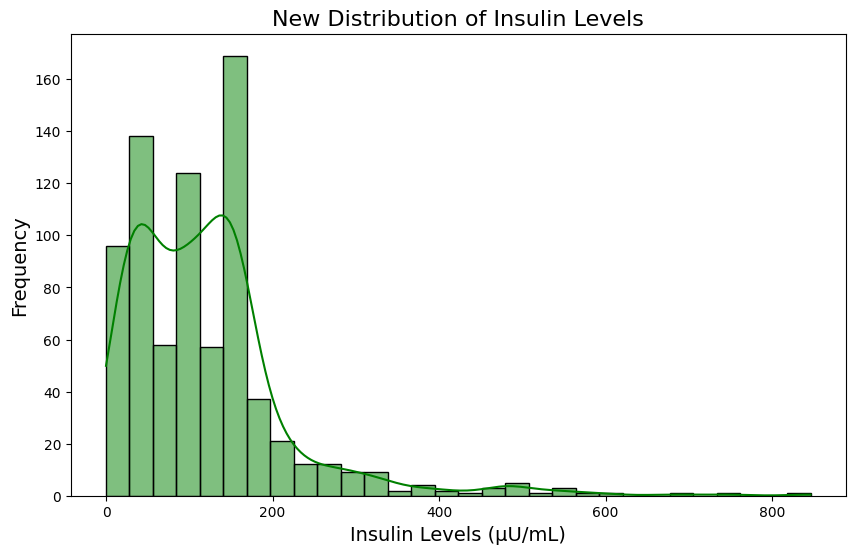

In [ ]:
# Plotting the distribution of the 'Insulin' column after imputating

plt.figure(figsize=(10, 6))
sns.histplot(df['Insulin'], kde=True, bins=30, color='green')
plt.title('New Distribution of Insulin Levels', fontsize=16)
plt.xlabel('Insulin Levels (µU/mL)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


This one was probably the most difficult column to work with and pre-process because we had a lot of insulin levels of 0 but did not know if it truly was a value of 0 or if it was empty or missing data. So because of that, we had to use domain knowledge as seen in the function to work with the values where insulin equaled zero. From domain knowledge, it is known that Type 1 diabetes patients cannot produce insulin so levels will be very low or close to 0 and their ideal glucose levels will be less than 70. So we made a function to kind of scale based off of that knowledge for evaluating if the values with zero truly were zero or if they should be another number or if they were an empty value. After that, we had to look at the outliers so any insulin level over 500 but was not a diabetes case was probably due to other health issues like Hyperinsulinemia, PCOS, or were undiagnosed pre-diabetes patients. There were also no cases for abnormal insulin regulation as stated above. At the end, we still decided to keep the outliers with the abnormally high insulin levels because these cases are cases that could still lead to diabetes. Insulin resistance and hyperinsulinemia are often precursors to type 2 diabetes. Outliers aren't always errors, they can be very informative and since it is high, when scaling, we would probably have to use a scaling method that is not robust to outliers or high numbers.

**BMI of 0 and investigate cases of BMI over 40**

In [ ]:
# See the unique values of the BMI column

unique_bmi_values = df['BMI'].unique()
sorted_unique_bmi_values = sorted(df['BMI'].unique())
print("Sorted unique values in BMI column:", sorted_unique_bmi_values)



Sorted unique values in BMI column: [np.float64(0.0), np.float64(18.2), np.float64(18.4), np.float64(19.1), np.float64(19.3), np.float64(19.4), np.float64(19.5), np.float64(19.6), np.float64(19.9), np.float64(20.0), np.float64(20.1), np.float64(20.4), np.float64(20.8), np.float64(21.0), np.float64(21.1), np.float64(21.2), np.float64(21.7), np.float64(21.8), np.float64(21.9), np.float64(22.1), np.float64(22.2), np.float64(22.3), np.float64(22.4), np.float64(22.5), np.float64(22.6), np.float64(22.7), np.float64(22.9), np.float64(23.0), np.float64(23.1), np.float64(23.2), np.float64(23.3), np.float64(23.4), np.float64(23.5), np.float64(23.6), np.float64(23.7), np.float64(23.8), np.float64(23.9), np.float64(24.0), np.float64(24.1), np.float64(24.2), np.float64(24.3), np.float64(24.4), np.float64(24.5), np.float64(24.6), np.float64(24.7), np.float64(24.8), np.float64(24.9), np.float64(25.0), np.float64(25.1), np.float64(25.2), np.float64(25.3), np.float64(25.4), np.float64(25.5), np.float64

In [ ]:
# See the cases where BMI is equal to 0

df[(df['BMI'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125.0,96,25,150.0,0.0,0.232,54,1
49,7,105.0,110,25,40.0,0.0,0.305,24,0
60,2,84.0,110,25,20.0,0.0,0.304,21,0
81,2,74.0,110,25,20.0,0.0,0.102,22,0
145,0,102.0,75,23,40.0,0.0,0.572,21,0
371,0,118.0,64,23,89.0,0.0,1.731,21,0
426,0,94.0,110,25,20.0,0.0,0.256,25,0
494,3,80.0,110,25,20.0,0.0,0.174,22,0
522,6,114.0,110,25,40.0,0.0,0.189,26,0
684,5,136.0,82,25,40.0,0.0,0.640,69,0


In [ ]:
# Imputing BMI values based on domain knowledge of BMI and blood pressure

def impute_bmi_based_on_age_bp(row):
    if row['BMI'] == 0:  # Only impute for missing BMI
        if row['Age'] <= 30:
            # Lower BMI expected for younger people
            return 22
        elif 30 < row['Age'] <= 60:
            if row['BloodPressure'] > 120:
                # Higher BMI expected for older people with high blood pressure
                return 28
            else:
                # Typical BMI for mid-age with normal blood pressure
                return 25
        else:
            # Higher BMI expected for individuals over 60
            return 30
    return row['BMI']  # If BMI is not 0, return the existing value

# Apply the function to impute missing BMI values
df['BMI'] = df.apply(impute_bmi_based_on_age_bp, axis=1)

In [ ]:
# Looking at our extreme outliers - 596 seems to be an outlier but could be considered a special case

df[(df['BMI'] > 45) & (df['Outcome'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
57,0,100.0,88,60,110.0,46.8,0.962,31,0
92,7,81.0,78,40,48.0,46.7,0.261,42,0
229,0,117.0,80,31,53.0,45.2,0.089,24,0
247,0,165.0,90,33,680.0,52.3,0.427,23,0
335,0,165.0,76,43,255.0,47.9,0.259,26,0
420,1,119.0,88,41,170.0,45.3,0.507,26,0
469,6,154.0,78,41,140.0,46.1,0.571,27,0
487,0,173.0,78,32,265.0,46.5,1.159,58,0
531,0,107.0,76,40,100.0,45.3,0.686,24,0
558,11,103.0,68,40,100.0,46.2,0.126,42,0


Since BMI cannot equal 0, a function was made to imputate a BMI index value based off factors such as blood pressure and age (these were the two variables with the highest correlation in our correlation matrix) and usually when a person ages, BMI might get larger because metabolism slows down. We still want to keep our outliers because these are real medical scenarios that can indicate cases that are precursors to developing diabetes which can help a patient out in the real world.

**Retraining the KNN and Decision Tree Models and Evaluation**


KNN Classification Performance:
Accuracy: 0.83

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87        99
           1       0.77      0.75      0.76        55

    accuracy                           0.83       154
   macro avg       0.82      0.81      0.81       154
weighted avg       0.83      0.83      0.83       154



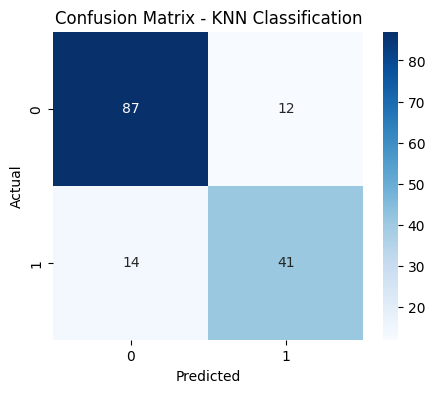

In [ ]:
# KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X = df.drop(columns=['Outcome'])
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


def evaluate_classification_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.2f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    # Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

evaluate_classification_model(y_test, y_pred, "KNN Classification")


Decision Tree Classification Performance:
Accuracy: 0.81

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85       101
           1       0.71      0.77      0.74        53

    accuracy                           0.81       154
   macro avg       0.79      0.80      0.80       154
weighted avg       0.82      0.81      0.81       154



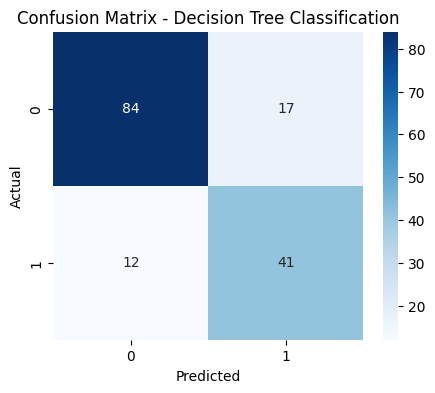

In [ ]:
## Decision Tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop(columns=['Outcome'])
y = df['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

n = X_test.shape[0]
p = X_train.shape[1]

dt_model = DecisionTreeClassifier(random_state=50)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

def evaluate_classification_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.2f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    # Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

evaluate_classification_model(y_test, dt_preds, "Decision Tree Classification")

In [ ]:
print("KNN:\n")
print(f"Accuracy: {knn_accuracy:.4f}")
print(f"Precision: {knn_precision:.4f}")
print(f"Recall: {knn_recall:.4f}")
print(f"F1 Score: {knn_f1:.4f}\n")

print("Decision Tree:\n")
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1 Score: {dt_f1:.4f}\n")

KNN:

Accuracy: 0.8312
Precision: 0.8300
Recall: 0.8312
F1 Score: 0.8304

Decision Tree:

Accuracy: 0.8117
Precision: 0.8167
Recall: 0.8117
F1 Score: 0.8133



**Our classifiers before using the baseline**

KNN:
*   Accuracy: 0.66
*   Precision (weighted avg): 0.67
*   Recall: 0.66
*   F1 Score: 0.67

Decision Tree:
*   Accuracy: 0.7068
*   Precision (weighted avg): 0.69
*   Recall: 0.70
*   F1 Score: 0.70



After imputation and handling missing data and replacing empty values with domain knowledge, we see that our evaluation metrics actually went up from the baseline model. In our evaluation of the baseline model, the Decision Tree was actually better but now here we see that KNN is performing well. Overall comparing our values now to the baseline model, evaluation went up by around ~6 points for the decision tree model and around ~7 points for our KNN model.

In [ ]:
# Saving this new cleaned dataset to use
df.to_csv("diabetes_cleaned.csv", index=False)

###**C: Feature Engineering**

**Creating a "Rare Cases/Outliers" Column**

We believed that creating a rare cases/outliers category for our data was important because there were some unusual cases in our dataset. With our domain knowledge of diabetes, there were things that sometimes did not make sense. Like having extremely high levels of glucose, low levels of insulin, and that person not having diabetes. Cases like this need to be as maybe they are pre-cursors to getting diabetes. These should not be overlooked because even though it is not a definite prediction, there are patients out there with cases like these that might get diabetes in the future.

In [ ]:
# Based on domain knowledge

df=pd.read_csv("diabetes_cleaned.csv")
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.714844,74.170573,29.039062,120.502604,32.322005,0.471876,33.240885,0.348958
std,3.369578,30.530310,14.564994,9.152683,100.110903,6.972297,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,25.000000,40.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,73.000000,29.500000,100.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,82.000000,34.000000,150.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,150.0,33.6,0.627,50,1
1,1,85.0,66,29,20.0,26.6,0.351,31,0
2,8,183.0,64,25,150.0,23.3,0.672,32,1
3,1,89.0,66,23,94.0,28.1,0.167,21,0
4,0,137.0,40,35,168.0,43.1,2.288,33,1


In [ ]:
# 1. Define rare cases based on features
df['rare_high_glucose'] = (df['Glucose'] > 200) | (df['Glucose'] < 70)
df['rare_extreme_insulin'] = (df['Insulin'] > 500) | (df['Insulin'] <= 0)
df['rare_high_bmi'] = df['BMI'] > 45
df['rare_high_pregnancies'] = df['Pregnancies'] > 10

# 2. Define rare cases where diabetes should be present but Outcome = 0
df['rare_cases_diabetes_missing'] = (df['rare_high_glucose'] | df['rare_extreme_insulin']) & (df['Outcome'] == 0)

# 3. Define rare cases where diabetes shouldn't be present but Outcome = 1
df['rare_cases_diabetes_present'] = ((df['Glucose'] < 70) & (df['Insulin'] <= 0) & (df['BMI'] < 18.2)) & (df['Outcome'] == 1)

# 4. Optional: Define rare cases where insulin is high but glucose is low (e.g., insulin resistance)
df['rare_insulin_high_glucose_low'] = (df['Insulin'] > 100) & (df['Glucose'] < 70)

# Combine all the flags into one column for rare cases
df['rare_cases_combined'] = (
    df['rare_high_glucose'] |
    df['rare_extreme_insulin'] |
    df['rare_high_bmi'] |
    df['rare_high_pregnancies'] |
    df['rare_cases_diabetes_missing'] |
    df['rare_cases_diabetes_present'] |
    df['rare_insulin_high_glucose_low']
)

# Drop the individual rare case columns
df.drop(columns=['rare_high_glucose', 'rare_extreme_insulin', 'rare_high_bmi', 'rare_high_pregnancies',
                 'rare_cases_diabetes_missing', 'rare_cases_diabetes_present', 'rare_insulin_high_glucose_low'], inplace=True)

# Combined column for rare cases
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'rare_cases_combined']]

df.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,rare_cases_combined
0,6,148.0,72,35,150.0,33.6,0.627,50,1,False
1,1,85.0,66,29,20.0,26.6,0.351,31,0,False
2,8,183.0,64,25,150.0,23.3,0.672,32,1,False
3,1,89.0,66,23,94.0,28.1,0.167,21,0,False
4,0,137.0,40,35,168.0,43.1,2.288,33,1,False


In [ ]:
# Move 'Outcome' column to the last position
df = df[[col for col in df.columns if col != 'Outcome'] + ['Outcome']]

# Convert the 'rare_cases_combined' to binary (True -> 1, False -> 0)
df['rare_cases_combined'] = df['rare_cases_combined'].astype(int)

# Count the occurrences of 0 and 1 (False and True)
count_rare_cases = df['rare_cases_combined'].value_counts()

# Display the counts
print("Count of rare cases (True = 1, False = 0):")
count_rare_cases

# 84 rare cases

Count of rare cases (True = 1, False = 0):


,count
rare_cases_combined,
0,684
1,84


**Creating a Glucose-to-Insulin Ratio**

In [ ]:
# Glucose-to-Insulin Ratio (Handle zero insulin properly)

df["Glucose_Insulin_Ratio"] = df.apply(
    lambda row: row["Glucose"] / row["Insulin"] if row["Insulin"] != 0 else 0, axis=1)

This glucose to insulin ratio is important because it helps identify the risk for diabetes, and reflects insulin sensitivity/resistance. A higher value can indicate insulin sensitivity and a lower value indicates resistance which leads to higher glucose levels over time.

**Creating Glucose x BMI or (Metabolic Stress Indicator)**

In [ ]:
# Glucose × BMI (Metabolic Stress Indicator)
# df["Metabolic_Stress_Indicator"] = df["Glucose"] * df["BMI"]

This metabolic stress indicator is important becuase it measures the body's response to stress and indicates the risk of any metabolic diseases. It reflects the balance between energy intake and expenditure.

**IMPORTANT NOTE:** Playing around with our newly created features, we found that keeping glucose-to-insulin ratio and the age-adjusted metabolic load gave the best results. Keeping the metabolic stress indicator actually lowered both KNN and DT models.

**Creating Glucose x Age (Age-Adjusted Metabolic Load)**

In [ ]:
# (Glucose × Age) / BMI (Age-Adjusted Metabolic Load)
df["Metabolic_load"] = (df["Glucose"] * df["Age"]) / df["BMI"]

This age-adjuted metabolic load measures age-related changes in a person's metabolism. As people age, their metabolism definitely changes. A person in their 80s has slower metabolism rates than a person in their 20s. Older people are more susceptible to developing Type 2 diabetes so this value reflects that.

In [ ]:
# Move 'Outcome' column to the last position
df = df[[col for col in df.columns if col != 'Outcome'] + ['Outcome']]

# Save our dataset with our new features
df.to_csv("diabetes_engineered.csv", index=False)

df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,rare_cases_combined,Glucose_Insulin_Ratio,Metabolic_load,Outcome
0,6,148.0,72,35,150.0,33.6,0.627,50,0,0.986667,220.238095,1
1,1,85.0,66,29,20.0,26.6,0.351,31,0,4.250000,99.060150,0
2,8,183.0,64,25,150.0,23.3,0.672,32,0,1.220000,251.330472,1
3,1,89.0,66,23,94.0,28.1,0.167,21,0,0.946809,66.512456,0
4,0,137.0,40,35,168.0,43.1,2.288,33,0,0.815476,104.895592,1


Note that we have also decided to keep our base features like glucose, BMI, age, etc. along with our new features that incorporate their relationships. This is because the interaction of these features might not be fully encompassed if we just kept the interaction features and not the base. The base features like glucose level and BMI as individuals are still very important to help evaluate if a patient has/does not have/will have diabetes. Additionally, we decided not to bin our age and BMI indices into categorical values because the decision tree model can already make the best split and by binning, we may lose some important data.

**Retraining our KNN and Decision Tree Models**

In [ ]:
X = df.drop(columns=["Outcome"])  # Updated features
y = df["Outcome"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn, average='weighted')
knn_recall = recall_score(y_test, y_pred_knn, average='weighted')
knn_f1 = f1_score(y_test, y_pred_knn, average='weighted')

# Decision Tree

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt, average='weighted')
dt_recall = recall_score(y_test, y_pred_dt, average='weighted')
dt_f1 = f1_score(y_test, y_pred_dt, average='weighted')

print("KNN:\n")
print(f"Accuracy: {knn_accuracy:.4f}")
print(f"Precision: {knn_precision:.4f}")
print(f"Recall: {knn_recall:.4f}")
print(f"F1 Score: {knn_f1:.4f}\n")

print("Decision Tree:\n")
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1 Score: {dt_f1:.4f}\n")


KNN:

Accuracy: 0.8312
Precision: 0.8312
Recall: 0.8312
F1 Score: 0.8312

Decision Tree:

Accuracy: 0.8312
Precision: 0.8372
Recall: 0.8312
F1 Score: 0.8329



**Our classifiers before using diabetes_cleaned.csv**

KNN:
*   Accuracy: 0.8312
*   Precision: 0.8300
*   Recall: 0.8312
*   F1 Score: 0.8304

Decision Tree:
*   Accuracy: 0.8117
*   Precision: 0.8167
*   Recall: 0.8117
*   F1 Score: 0.8133

**In the scenario where we kept all 3 of our new features:** After feature engineering and comparing our current models to the ones before creating our new features, we see that the decision tree model increased by a little while the KNN model decreased by around ~3-4 points. This might be because KNN is a distanced-based algorithm and our wide range of values might have impacted the evaluation metrics. Furthermore, the more features created, KNN actually becomes less effective because of the number of dimensions. Because the decision tree went up, it shows that our newly created features are useful and relevant to our data. Let's try scaling and normalizing our values to see if the KNN model improves.

**In the scenario where we only kept glucose-to-insulin ratio and metabolic load and got rid of the metabolic stress indicator:** After feature engineering and comparing our current models to the ones before creating our new features, we see that BOTH the decision tree model and KNN model increased values by ~2 points and slightly, respectively. This means that the metabolic stress indicator was helpful, but it wasn't as helpful as just keeping the two features we have currently. We will move further with this model.

###**D: Feature Scaling & Normalization**

In [ ]:
# List of features to standardize - the numerical features only, no categorical!!
features_to_standardize = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                           'BMI', 'DiabetesPedigreeFunction', 'Age', 'Glucose_Insulin_Ratio', 'Metabolic_load']

# Initialize the scaler
scaler = StandardScaler()

# Standardize the features
df[features_to_standardize] = scaler.fit_transform(df[features_to_standardize])

df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,rare_cases_combined,Glucose_Insulin_Ratio,Metabolic_load,Outcome
0,0.639947,0.861514,-0.149124,0.651702,0.294839,0.183416,0.468492,1.425995,0,-0.523690,1.239245,1
1,-0.844885,-1.203354,-0.561339,-0.004271,-1.004567,-0.821212,-0.365061,-0.190672,0,1.905250,-0.462315,0
2,1.233880,2.008663,-0.698744,-0.441586,0.294839,-1.294822,0.604397,-0.105584,0,-0.350017,1.675839,1
3,-0.844885,-1.072251,-0.561339,-0.660243,-0.264905,-0.605935,-0.920763,-1.041549,0,-0.553357,-0.919344,0
4,-1.141852,0.500981,-2.347604,0.651702,0.474757,1.546839,5.484909,-0.020496,0,-0.651109,-0.380375,1


**Retraining our KNN and Decision Tree Models**

In [ ]:
X = df.drop(columns=["Outcome"])  # Updated features
y = df["Outcome"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn, average='weighted')
knn_recall = recall_score(y_test, y_pred_knn, average='weighted')
knn_f1 = f1_score(y_test, y_pred_knn, average='weighted')

# Decision Tree

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt, average='weighted')
dt_recall = recall_score(y_test, y_pred_dt, average='weighted')
dt_f1 = f1_score(y_test, y_pred_dt, average='weighted')

print("KNN:\n")
print(f"Accuracy: {knn_accuracy:.4f}")
print(f"Precision: {knn_precision:.4f}")
print(f"Recall: {knn_recall:.4f}")
print(f"F1 Score: {knn_f1:.4f}\n")

print("Decision Tree:\n")
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1 Score: {dt_f1:.4f}\n")

KNN:

Accuracy: 0.7597
Precision: 0.7608
Recall: 0.7597
F1 Score: 0.7602

Decision Tree:

Accuracy: 0.8312
Precision: 0.8372
Recall: 0.8312
F1 Score: 0.8329



Here we see that the KNN model evaluation metrics decreased by ~7-8 points while the decision tree model stayed exactly the same. This indicates that standardizing has a negative impact on our KNN model. The decision tree model is not affected because it is not sensitive to feature scaling since it just splits based on criteria. Let's see if we can find the best value for k to see if the KNN model improves and if it doesn't, then we will move forward with our unstandardized data.

**Finding the best value for k to see if the KNN model improves**

In [ ]:
# Define the parameter grid for k
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)  # X_train_scaled is the standardized features

# Get the best k value
print(f"Best k value: {grid_search.best_params_['n_neighbors']}")


Best k value: 7


In [ ]:
# Initialize the KNN classifier with k=7
knn = KNeighborsClassifier(n_neighbors=7)

# Train the model
knn.fit(X_train, y_train)  # Make sure X_train_scaled contains the standardized features

# Predict on the test set
y_pred = knn.predict(X_test)  # Make sure X_test_scaled contains the standardized test features

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)  # y_test is your true test labels
print(f"KNN model accuracy with k=7: {accuracy}")


KNN model accuracy with k=7: 0.7727272727272727


Our best value for k was 7. Although our KNN model accuracy increased by about ~1-2 points, there is still a negative impact of scaling on our model. It is okay if we do not need to scale as this process is iterative, meaning we can go back and play around to see what our best options are. Depending on the model you use, standardization can be beneficial (and in our case, disadvantageous). This is because some models's parameters can be affected by scaling, like the KNN model since it is distance-based. Because scaling negatively impacts our KNN model, we will work with our non-standardized dataset working forward.

## Balancing ( part of scaling and normalization ) (imbalance shown in confusion matrix)

In [ ]:
df=pd.read_csv("diabetes_engineered.csv")
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,rare_cases_combined,Glucose_Insulin_Ratio,Metabolic_load,Outcome
0,6,148.0,72,35,150.0,33.6,0.627,50,0,0.986667,220.238095,1
1,1,85.0,66,29,20.0,26.6,0.351,31,0,4.250000,99.060150,0
2,8,183.0,64,25,150.0,23.3,0.672,32,0,1.220000,251.330472,1
3,1,89.0,66,23,94.0,28.1,0.167,21,0,0.946809,66.512456,0
4,0,137.0,40,35,168.0,43.1,2.288,33,0,0.815476,104.895592,1


In [ ]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [ ]:
from imblearn.over_sampling import ADASYN
from collections import Counter
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)
print("Resampled class distribution:", Counter(y_resampled))

Resampled class distribution: Counter({1: 506, 0: 500})


Resampled class distribution: Counter({1: 506, 0: 500})


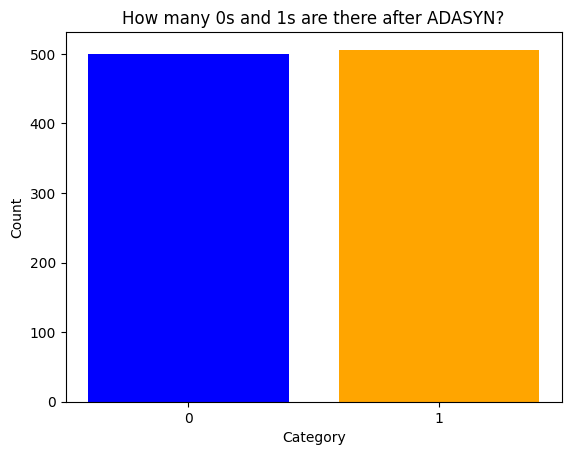

In [ ]:
class_counts = Counter(y_resampled)
print("Resampled class distribution:", class_counts)

# Convert to sorted value counts
class_labels, class_values = zip(*sorted(class_counts.items()))

plt.bar(class_labels, class_values, color=['blue', 'orange'])
plt.xticks(class_labels)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('How many 0s and 1s are there after ADASYN?')
plt.show()


KNN Classification Performance:
Accuracy: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79       100
           1       0.79      0.82      0.80       102

    accuracy                           0.80       202
   macro avg       0.80      0.80      0.80       202
weighted avg       0.80      0.80      0.80       202



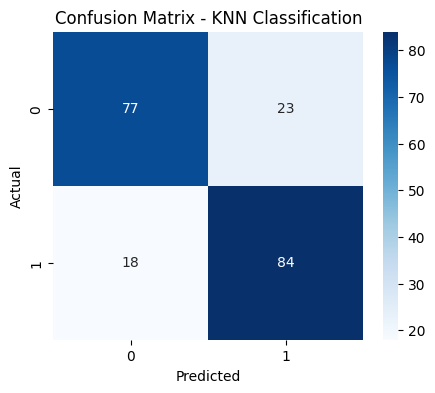

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=4)


knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

def evaluate_classification_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.2f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    # Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

evaluate_classification_model(y_test, y_pred, "KNN Classification")

#**Part 3: Advancing to More Complex Models**

Note: We worked with several models here with variations between the models (especially stacking) but for comparison, we used the final model's scores

In [ ]:
# Working with our un-standardized data

df=pd.read_csv("diabetes_engineered.csv")
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,rare_cases_combined,Glucose_Insulin_Ratio,Metabolic_load,Outcome
0,6,148.0,72,35,150.0,33.6,0.627,50,0,0.986667,220.238095,1
1,1,85.0,66,29,20.0,26.6,0.351,31,0,4.250000,99.060150,0
2,8,183.0,64,25,150.0,23.3,0.672,32,0,1.220000,251.330472,1
3,1,89.0,66,23,94.0,28.1,0.167,21,0,0.946809,66.512456,0
4,0,137.0,40,35,168.0,43.1,2.288,33,0,0.815476,104.895592,1


We will test out Random Forest, XGBoost, LightGBM, Logistic Regression, and SVM to see which yields the best results. And out of the best one from those, we will then hypertune it using grid search and work from there.

###**Random Forest Classifier with ADASYN**

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

X = df.drop(columns=['Outcome'])
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Random Forest Classifier Performance with ADASYN:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Random Forest Classifier Performance with ADASYN:
Accuracy: 0.8515
Precision: 0.8396
Recall: 0.8725
F1-Score: 0.8558


###**XGBoost Decision Tree with resampled X and Y**

In [ ]:
# Import necessary libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


xgb_model = xgb.XGBClassifier(eval_metric='logloss')


xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"XGBoost Decision Tree Classifier Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


XGBoost Decision Tree Classifier Performance:
Accuracy: 0.8713
Precision: 0.8393
Recall: 0.9216
F1 Score: 0.8785


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import ADASYN


X = df.drop(columns=['Outcome'])
y = df['Outcome']


adasyn = ADASYN(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


xgb_model = xgb.XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)


y_pred = xgb_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"XGBoost Decision Tree Classifier Performance with ADASYN:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

XGBoost Decision Tree Classifier Performance with ADASYN:
Accuracy: 0.8713
Precision: 0.8393
Recall: 0.9216
F1 Score: 0.8785


## **LightGBM with ADASYN**

In [100]:
import lightgbm as lgb
import warnings
from imblearn.over_sampling import ADASYN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

adasyn = ADASYN(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

lgb_model = lgb.LGBMClassifier(verbose=-1)


lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)


accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
precision_lgb = precision_score(y_test, y_pred_lgb)
recall_lgb = recall_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb)


print("\nLightGBM with ADASYN:")
print(f"Accuracy: {accuracy_lgb:.4f}")
print(f"Precision: {precision_lgb:.4f}")
print(f"Recall: {recall_lgb:.4f}")
print(f"F1 Score: {f1_lgb:.4f}")



LightGBM with ADASYN:
Accuracy: 0.8960
Precision: 0.8649
Recall: 0.9412
F1 Score: 0.9014


###**Logistic Regression with ADASYN and scaled features**

**Note:** For logistic regression, it is best to scale your data so that we do not reach the max_iterations limit.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = df.drop(columns=['Outcome'])
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)


log_reg = LogisticRegression(max_iter=200)


log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Logistic Regression with Scaled Features:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Logistic Regression with Scaled Features:
Accuracy: 0.7624
Precision: 0.7411
Recall: 0.8137
F1 Score: 0.7757


###**SVM with ADASYN**

In [103]:
from sklearn.svm import SVC
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


X = df.drop(columns=['Outcome'])
y = df['Outcome']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


adasyn = ADASYN(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_scaled, y)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)


y_pred_svm = svm_model.predict(X_test)

print("\nSVM with ADASYN:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")



SVM with ADASYN:
Accuracy: 0.7574
Precision: 0.7345
Recall: 0.8137
F1 Score: 0.7721


For our advanced models, we tried Random Forest, XGBoost, LightGBM, logistic regression, and support vector machine learning (SVM). Random forest, XGboost, and LightGBM are all gradient boosting models while SVM is used more on high-dimensional datasets. We note that logistic regression works best with scaled data so we used that instead but the results were still not as high. After analyzing all our evaluation metric scores, Random Forest provided us with the highest so we will use this. Let's find the best hyperparameters for our data using a grid search.

### **Hypertuning Random Forest**

Note: We ran this code in a separate notebook so the rest of our cells could run. I have attached the results that we utilized in this notebook.

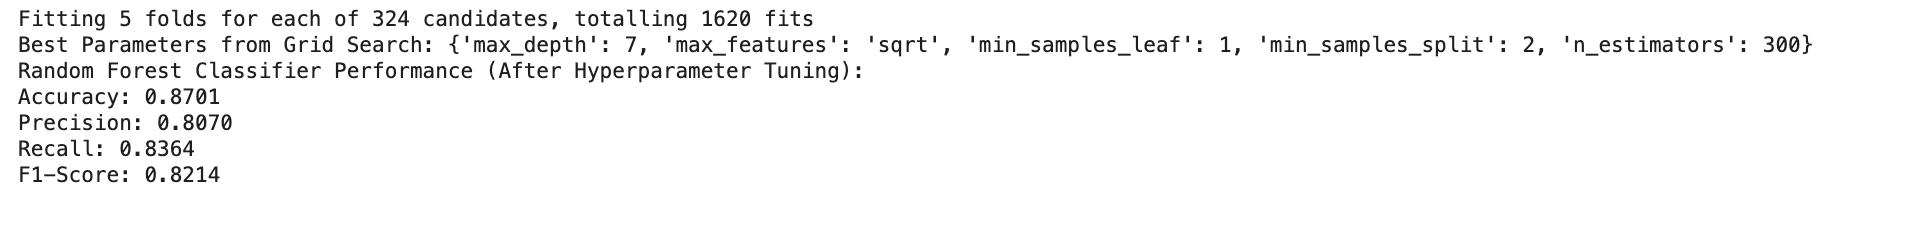

In [ ]:

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, None],
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2', None],  # Replace 'auto' with 'sqrt', 'log2', or None
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

print("Best Parameters from Grid Search:", best_params)

# Evaluate the model with the best parameters
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

# Calculate and print performance metrics for the tuned model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

print(f"Random Forest Classifier Performance (After Hyperparameter Tuning):")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"Precision: {precision_best:.4f}")
print(f"Recall: {recall_best:.4f}")
print(f"F1-Score: {f1_best:.4f}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


KeyboardInterrupt: 

###**Retraining Random Forest with the Best Hyperparameters and Using ADASYN**

The best hyperparameters for this model are bootstrap=False, max_depth=7, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, and n_estimators=300.

In [ ]:
# Initialize the RandomForestClassifier with the best hyperparameters
rf_model = RandomForestClassifier(
    bootstrap=False,
    max_depth=7,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300
)

# Train the model on your training data
rf_model.fit(X_train, y_train)

# Evaluate the model on your test data
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Random Forest Classifier Performance (After Hyperparameter Tuning):")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Random Forest Classifier Performance (After Hyperparameter Tuning):
Accuracy: 0.8829787234042553
Precision: 0.9
Recall: 0.8372093023255814
F1-Score: 0.8674698795180723


In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Apply ADASYN to balance the dataset
adasyn = ADASYN(sampling_strategy='auto', random_state=42, n_neighbors=5)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Initialize the RandomForestClassifier with the best hyperparameters
rf_model = RandomForestClassifier(
    bootstrap=False,
    max_depth=7,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300,
    random_state=42
)

# Train the model on the resampled dataset
rf_model.fit(X_resampled, y_resampled)

# Evaluate the model on the original test data
y_pred = rf_model.predict(X_test)

# Compute performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f"Random Forest Classifier Performance (After Applying ADASYN & Hyperparameter Tuning):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Random Forest Classifier Performance (After Applying ADASYN & Hyperparameter Tuning):
Accuracy: 0.8777
Precision: 0.8987
Recall: 0.8256
F1-Score: 0.8606


## **Using Ratio of Positive to Negative in XGBoost**

In [105]:
import xgboost as xgb
from sklearn.metrics import classification_report


scale_pos_weight = sum(y == 0) / sum(y == 1)

model = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("Evaluating XGBoost with scale_pos_weight")
print(classification_report(y_test, predictions))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:39:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Evaluating XGBoost with scale_pos_weight
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       102
           1       0.90      0.83      0.86        86

    accuracy                           0.88       188
   macro avg       0.88      0.87      0.88       188
weighted avg       0.88      0.88      0.88       188



## **Using SMOTE with RandomForest**

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


over = SMOTE(sampling_strategy='auto', random_state=42)
under = RandomUnderSampler(sampling_strategy='auto', random_state=42)

pipeline = Pipeline([
    ('over', over),
    ('under', under),
    ('model', RandomForestClassifier(random_state=42))
])


pipeline.fit(X_train, y_train)

predictions = pipeline.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        99
           1       0.79      0.84      0.81        55

    accuracy                           0.86       154
   macro avg       0.85      0.86      0.85       154
weighted avg       0.87      0.86      0.86       154



## **Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Convert labels to categorical format (one-hot encoding)
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

# Compute class weights to handle imbalance
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

print("Computed Class Weights:", class_weight_dict)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes -> Softmax activation
])

# Compile the model with categorical cross-entropy loss
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using class weights
model.fit(X_train, y_train_cat, epochs=20, batch_size=32, validation_split=0.2, class_weight=class_weight_dict)

# Evaluate the model
predictions = model.predict(X_test)
predictions_class = np.argmax(predictions, axis=1)  # Convert softmax output to class labels

# Print classification report
from sklearn.metrics import classification_report
print("Evaluating Neural Network Model with Class Weights")
print(classification_report(y_test, predictions_class))


Computed Class Weights: {0: np.float64(0.7655860349127181), 1: np.float64(1.4413145539906103)}
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4007 - loss: 18.2946 - val_accuracy: 0.4146 - val_loss: 3.1276
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4840 - loss: 2.9662 - val_accuracy: 0.7317 - val_loss: 1.1886
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6880 - loss: 1.4167 - val_accuracy: 0.6992 - val_loss: 1.0174
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6961 - loss: 0.9881 - val_accuracy: 0.6829 - val_loss: 1.1591
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6749 - loss: 1.0749 - val_accuracy: 0.7561 - val_loss: 0.7072
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6724 - loss: 0.9624 - val_accuracy: 0.7236 - val_loss: 0.6648
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6840 - loss: 0.8808 - val_accuracy: 0.7398 - val_loss: 0.5926
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7050 - loss: 0.7107 - val_accuracy: 0.7561 - val_loss: 0.6

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Evaluating Neural Network Model with Class Weights
              precision    recall  f1-score   support

           0       0.89      0.64      0.74        99
           1       0.57      0.85      0.68        55

    accuracy                           0.71       154
   macro avg       0.73      0.75      0.71       154
weighted avg       0.77      0.71      0.72       154



## **Neural Network with ADASYN and changed the weighting and rescaled**

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply ADASYN to balance the dataset
adasyn = ADASYN(sampling_strategy='auto', random_state=42, n_neighbors=5)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_scaled, y_train)


y_train_cat_resampled = to_categorical(y_train_resampled, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}


lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)


model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
              metrics=['accuracy'])


model.fit(X_train_resampled, y_train_cat_resampled,
          epochs=50, batch_size=32, validation_split=0.2,
          class_weight=class_weight_dict, callbacks=[lr_scheduler])


predictions = model.predict(X_test_scaled)
predictions_class = np.argmax(predictions, axis=1)


from sklearn.metrics import classification_report
print("Evaluating Neural Network Model with ADASYN & Optimizations")
print(classification_report(y_test, predictions_class))


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.3491 - loss: 1.0327 - val_accuracy: 0.8421 - val_loss: 0.7277 - learning_rate: 0.0010
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7502 - loss: 0.7374 - val_accuracy: 0.6184 - val_loss: 0.7845 - learning_rate: 0.0010
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8075 - loss: 0.6351 - val_accuracy: 0.6513 - val_loss: 0.7811 - learning_rate: 0.0010
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7988 - loss: 0.6363 - val_accuracy: 0.7303 - val_loss: 0.7438 - learning_rate: 0.0010
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8225 - loss: 0.5750 - val_accuracy: 0.7368 - val_loss: 0.7313 - learning_rate: 5.0000e-04
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8281 - loss: 0.5772 - val_accuracy: 0.7237 - val_loss: 0.7565 - learning_rate: 5.0000e-04
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8134 - loss: 0.5664 - val_accura

##**Stacking using ADASYN (RandomForest and XGBoost as Base Models)**

In [ ]:
import xgboost as xgb
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import Counter
# We used ADASYN for all of the mdoels that's what we start with
adasyn = ADASYN(sampling_strategy='auto', random_state=42, n_neighbors=5)
X_resampled, y_resampled = adasyn.fit_resample(X_scaled, y)

print("Class distribution after ADASYN:", Counter(y_resampled))


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


base_models = [
    ('xgb', xgb.XGBClassifier(objective="multi:softmax", num_class=3, eval_metric="mlogloss", use_label_encoder=False)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]

meta_model = LogisticRegression(max_iter=1000)


stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, passthrough=True)


stacking_model.fit(X_train, y_train)

predictions = stacking_model.predict(X_test)

print("Evaluating Stacked Model with ADASYN")
print(classification_report(y_test, predictions))


Class distribution after ADASYN: Counter({0: 500, 1: 437})


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:32:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:32:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:32:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:32:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:32:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Evaluating Stacked Model with ADASYN
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       102
           1       0.91      0.81      0.86        86

    accuracy                           0.88       188
   macro avg       0.88      0.87      0.88       188
weighted avg       0.88      0.88      0.88       188



##**Stacking using SMOTE (RandomForest and XGBoost as Base Models) (EVERY SCORE WAS THE EXACT SAME)**

In [ ]:
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import Counter

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print("Class distribution after SMOTE:", Counter(y_resampled))


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


base_models = [
    ('xgb', xgb.XGBClassifier(objective="multi:softmax", num_class=3, eval_metric="mlogloss", use_label_encoder=False)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]

meta_model = LogisticRegression(max_iter=1000)


stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, passthrough=True)


stacking_model.fit(X_train, y_train)

predictions = stacking_model.predict(X_test)

print("Evaluating Stacked Model with SMOTE")
print(classification_report(y_test, predictions))


Class distribution after SMOTE: Counter({1: 500, 0: 500})


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:36:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:36:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:36:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Evaluating Stacked Model with SMOTE
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        99
           1       0.88      0.88      0.88       101

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



##**Stacking using SMOTE (SVC, KNN, and LightGBM as Base Models and Random Forest as the Meta-Model)**

In [ ]:
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import Counter

# Step 1: Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)


print("Class distribution after SMOTE:", Counter(y_resampled))

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


base_models = [
    ('lgbm', lgb.LGBMClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(probability=True, kernel='rbf', random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]
meta_model = RandomForestClassifier(n_estimators=200, random_state=42)


stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, passthrough=True)

stacking_model.fit(X_train, y_train)


predictions = stacking_model.predict(X_test)

print("Evaluating Stacked Model with SMOTE and Random Forest as Meta-Model")
print(classification_report(y_test, predictions))


Class distribution after SMOTE: Counter({1: 500, 0: 500})


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Evaluating Stacked Model with SMOTE and Random Forest as Meta-Model
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        99
           1       0.88      0.88      0.88       101

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import Counter

# Step 1: Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Show the new class distribution
print("Class distribution after SMOTE:", Counter(y_resampled))

# Step 2: Split the balanced dataset into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 3: Define new base models
base_models = [
    ('lgbm', lgb.LGBMClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(probability=True, kernel='rbf', random_state=42)),
]

# Step 4: Define the meta-classifier (Logistic Regression)
meta_model = LogisticRegression(max_iter=1000)

# Step 5: Create the Stacking Model
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, passthrough=True)

# Train the stacked model
stacking_model.fit(X_train, y_train)

# Step 6: Predict and evaluate performance
predictions = stacking_model.predict(X_test)

print("Evaluating Stacked Model with SMOTE and New Base Models")
print(classification_report(y_test, predictions))


Class distribution after SMOTE: Counter({1: 500, 0: 500})


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Evaluating Stacked Model with SMOTE and New Base Models
              precision    recall  f1-score   support

           0       0.89      0.90      0.89        99
           1       0.90      0.89      0.90       101

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


## **Stacking using SMOTEEN XGBoost and RandomTree as the Base and Logistic Regression as the Meta (BEST SCORE)**

In [ ]:
import xgboost as xgb
from imblearn.combine import SMOTEENN
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import Counter

# Step 1: Apply SMOTEENN to balance the dataset
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_scaled, y)

print("Class distribution after SMOTEENN:", Counter(y_resampled))

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

base_models = [
    ('xgb', xgb.XGBClassifier(objective="multi:softmax", num_class=3, eval_metric="mlogloss", use_label_encoder=False)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]

meta_model = LogisticRegression(max_iter=1000)

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, passthrough=True)

stacking_model.fit(X_train, y_train)

predictions = stacking_model.predict(X_test)

print("Evaluating Stacked Model with SMOTEENN")
print(classification_report(y_test, predictions))

Class distribution after SMOTEENN: Counter({1: 373, 0: 324})


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:24:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:24:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Evaluating Stacked Model with SMOTEENN
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        73
           1       0.97      0.99      0.98        67

    accuracy                           0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



#**Part 4: Model Comparison and Selection**

###**1. Compare evaluation metrics for KNN, Decision Tree, and Random Forest**

For this evaluation, we will take the BEST scores for each model. This means that the unscaled/unstandardized data will be used for these 3 models because the unstandardized data yielded higher scores than the standardized data.

**Accuracy Evaluation Scores**

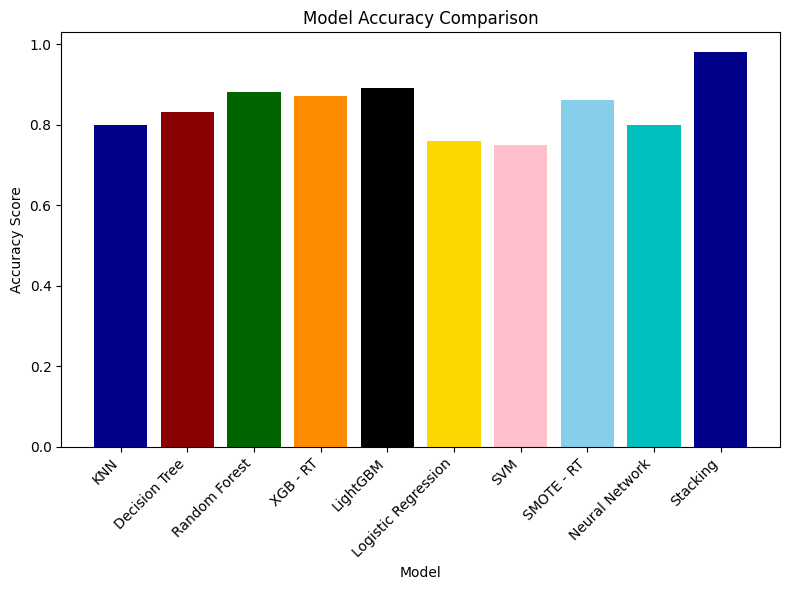

In [111]:
# Data for the models and their accuracy scores
models = ['KNN', 'Decision Tree', 'Random Forest', 'XGB - RT', 'LightGBM', 'Logistic Regression', 'SVM', 'SMOTE - RT','Neural Network', 'Stacking']
accuracy_scores = [0.80, 0.83, 0.88, 0.87, 0.89, 0.76, 0.75, 0.86, 0.80, 0.98]

plt.figure(figsize=(8,6))
plt.bar(models, accuracy_scores, color=['darkblue', 'darkred', 'darkgreen','darkorange','black','gold','pink','skyblue','c'])


plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

**Precision Evaluation Scores**

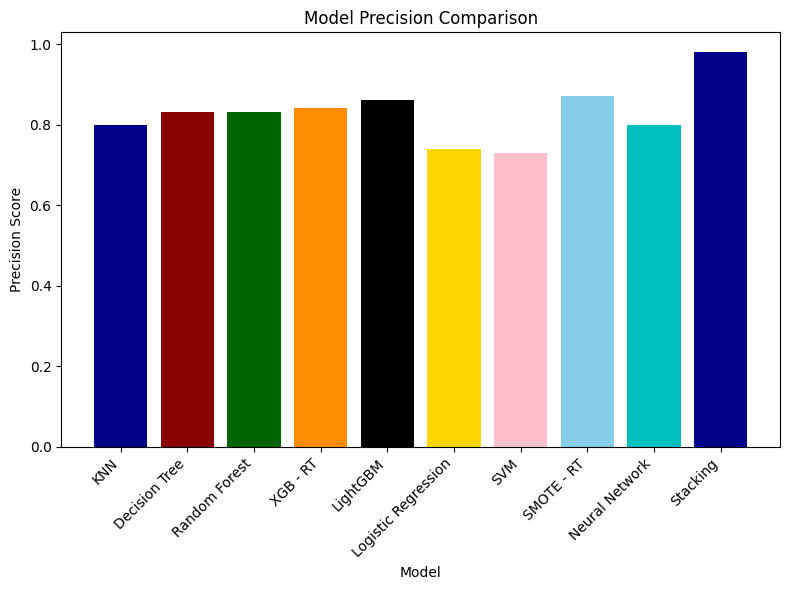

In [114]:
models = ['KNN', 'Decision Tree', 'Random Forest', 'XGB - RT', 'LightGBM', 'Logistic Regression', 'SVM', 'SMOTE - RT','Neural Network', 'Stacking']
precision_scores = [0.80, 0.83, 0.83, 0.84, 0.86, 0.74, 0.73, 0.87, 0.80 ,0.98]


plt.figure(figsize=(8,6))
plt.bar(models, precision_scores, color=['darkblue', 'darkred', 'darkgreen','darkorange','black','gold','pink','skyblue','c'])


plt.xlabel('Model')
plt.ylabel('Precision Score')
plt.title('Model Precision Comparison')
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

**Recall Evaluation Scores**

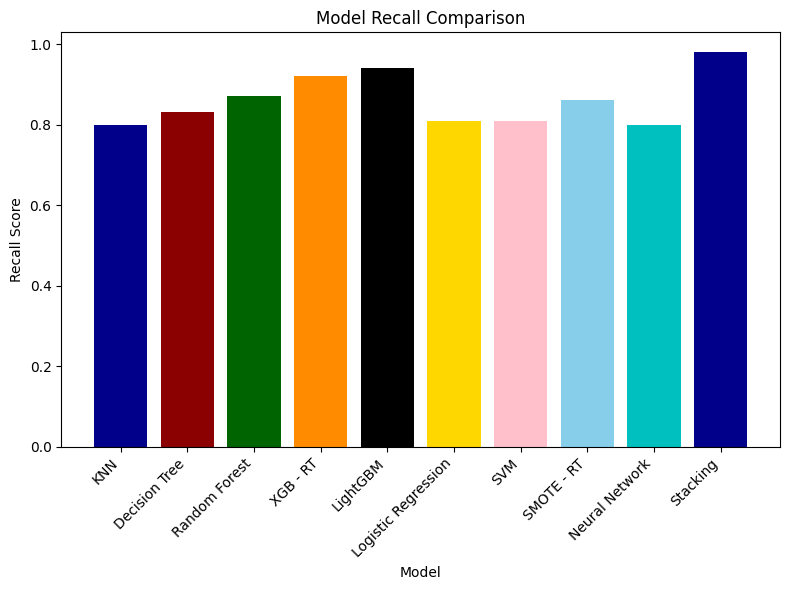

In [116]:

models = ['KNN', 'Decision Tree', 'Random Forest', 'XGB - RT', 'LightGBM', 'Logistic Regression', 'SVM', 'SMOTE - RT','Neural Network', 'Stacking']
recall_scores = [0.80, 0.83, 0.87, 0.92, 0.94, 00.81, 0.81, 0.86, 0.80 ,0.98]


plt.figure(figsize=(8,6))
plt.bar(models, recall_scores, color=['darkblue', 'darkred', 'darkgreen','darkorange','black','gold','pink','skyblue','c'])

plt.xlabel('Model')
plt.ylabel('Recall Score')
plt.title('Model Recall Comparison')
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

**F1 Score Evaluation Scores**

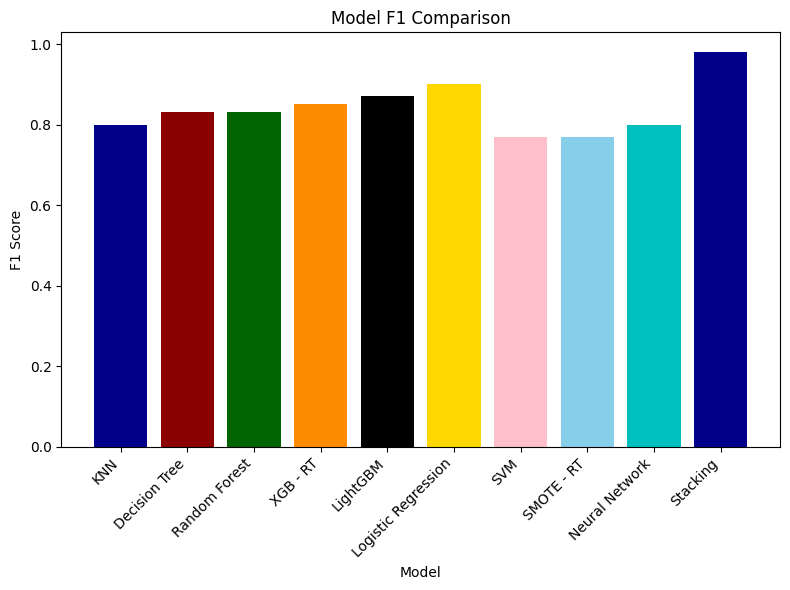

In [118]:
# Data for the models and their F1 scores
models = ['KNN', 'Decision Tree', 'Random Forest', 'XGB - RT', 'LightGBM', 'Logistic Regression', 'SVM', 'SMOTE - RT','Neural Network', 'Stacking']
f1_scores = [0.80, 0.83, 0.83, 0.85, 0.87, 0.90, 0.77, 0.77, 0.80 ,0.98]

# Create the bar plot
plt.figure(figsize=(8,6))
plt.bar(models, f1_scores, color=['darkblue', 'darkred', 'darkgreen','darkorange','black','gold','pink','skyblue','c'])

# Add labels and title
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('Model F1 Comparison')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

# Display the plot
plt.show()

###**2. Discuss the advantages and disadvantages of each model for predicting diabetes**

- KNN is best for smaller datasets where interpretability and simplicity are desired (this is because we do not need assumptions on the data - it is nonparametric), but it's computationally expensive as data grows. It's also sensitive to feature scaling as we saw with comparing our evaluation metrics before and after scaling.

- Decision Trees are very interpretable and flexible, but they also tend to overfit, making them less reliable unless the hyperparameters are tuned properly. They can be used if interpretability and clear decision rules are important. Feature scaling is also not required for this as we saw with our data and it can handle both categorical and numerical data because it just finds the best split.

- Random Forests are generally the best-performing option among these three, especially for datasets with more features. They reduce overfitting, are robust to noise, and work well even with large datasets. However, they are harder to interpret and also computationally more expensive (finding the best hyperparamets took about ~10-15 minutes).

- XGBoost is good for our dataset based on how it's structured and is quicker than the other models. The downside of this model is it was really hard to tune and customize.

- LightGBM is great for learning quick as well and was able to handle our dataset well. The only thing was that it was also hard to tune (I didn't even know what to tune).

- Logistic Regression was quite simple and was useful to interpret our data using logistical transformations to predict. But you have to be careful with the data used as it must be scaled (we had to use the scaled version of our resampled X and y, but it still yielded a low result)

- SVM was great for learning quick like LightGBM. Like logistic regression, it needs to have scaled data. But it also really didn't have a high result, which is confusing because I assumed that our data was high-dimensional. So maybe not being the level of high-dimensionality that it wanted could be the issue.

- SMOTE was good to resample the X and Y in a way that ADASYN doesn't. It focuses on the whole dataset rather just the minority like ADASYN. But I think that might have been the issue, not focusing on the minority or maybe because I had already balanced the dataset with ADASYN? It is tricky with the tyoe of data it needs.

- Neural Network was good for this dataset because it could also recognize the patterns that logistic regression could because it was non-linear. It was really quick as well. We also didn't yield a high score from this model, potentially because the dataset may have been smaller than it needs to be to be efficient.

- Stacking worked great because it allowed us to combine the best of the models that worked in the past cells and the meta-model will learn from the base models. But picking which models to include as your base and meta models was incredibly confusing and counterintuitive at times.

Overall, for predicting diabetes, Random Forest would likely be the best option due to its strong performance.

###**3. Which model would you reccomend for clinical use? Justify your choice**

In a medical scenario, the most important thing are false negatives (for example, when a test says a patient is not pregnant, when in reality, they actually are). This is because false negatives can be crucial for identifying and treating a patient. If a patient has cancer but the test says they do not, this can be fatal if they do not receive the treatment they need. Because of this consisderation, RECALL is the most important evaluation metric since it considers the true positives against the false negatives. If we are looking solely at the recall scores for our 10 models, our Stacking model using XGBoost and Random Tree as the base models and Logistic Regression as the meta model has the highest recall score of 0.98. Because this has the highest recall rate, we would want to use the Stacking model as our model to deploy for clinical use.

#**FINAL RESULTS**

**Stacking Model Evaluation Scores (Our Best Model)**
- **Accuracy:** 98%
- **Precision:** 98%
- **Recall:** 98%
- **F1:** 98%

## ***Out of our 10 models, from our lowest base model (KNN with 66% accuracy) to our highest final model (Stacking with 98% accuracy), our ACCURACY score went up by ~32 points***